In [12]:
import scipy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, widgets
%matplotlib inline
%run vtoolbox

From Inman Eq.1.94 we can see that a sdof can be described by two coupled first order differential equation:

\begin{equation}
m\ddot{x}(t) + c\dot{x}(t) + kx(t) = 0\\
\downarrow\\
\dot{x}_1(t) = x_2(t)\\
\dot{x}_2(t) = -\frac{c}{m}\ x_2(t) - \frac{k}{m}\ x_1(t)
\end{equation}

These equations can be written in matrix form:
\begin{equation}
{\bf A} = 
\left[ \matrix{
0 & 1 \\
-\frac{k}{m} & -\frac{c}{m}  \\
} \right]
{\bf x}(t) = 
\left[ \matrix{
x_1(t) \\
x_2(t) \\
} \right]
\\
\dot{\bf x}(t) = A{\bf x}(t)
\end{equation}

Now the Euler method can be applied:
\begin{equation}
{\bf x}(t_{i+1}) = {\bf x}(t_i) + \Delta tA{\bf x}(t_i)\\
\end{equation}
This is implemented in the function sdof_euler (you can see the implementation using sdof_euler?? in the notebook)

A more accurate procedure is the Runge-Kutta method, described by Eq. 1.92:
\begin{equation}
x_{n+1} = x_n + \frac{\Delta t}{6}(k_{n1} + 2k_{n2} + 2k_{n3} + k_{n4}) \\
\end{equation}

where:

\begin{equation}
k_{n1} = f(x_n,t_n)\\
k_{n2} = f\Big(x_n + \frac{\Delta t}{2}k_{n1}, t_n + \frac{\Delta t}{2}\Big)\\
k_{n3} = f\Big(x_n + \frac{\Delta t}{2}k_{n2}, t_n + \frac{\Delta t}{2}\Big)\\
k_{n4} = f(x_n + {\Delta t}k_{n3}, t_n + {\Delta t})
\end{equation}

The Runge-Kutta method is implemented in the function sdof_rk4.

Below we have a comparison between the analytical response, the Euler and the Runge-Kutta method (dt is the step size).

The natural frequency is  1.0 rad/s.
The damping ratio is  0.05
The damped natural frequency is  0.998749217772
A = 1.00125234864
phi = 1.52077546999


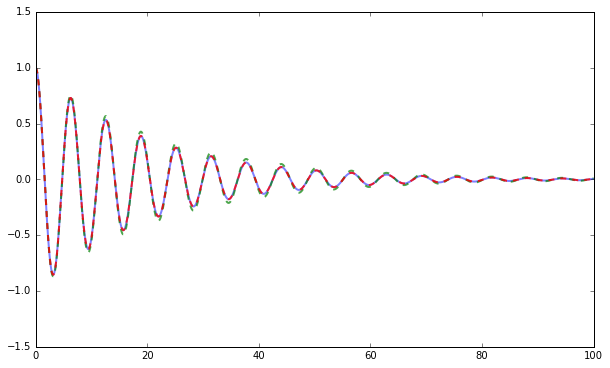

In [66]:
@interact(dt=widgets.FloatSlider(min=0.01,max=0.1,step=0.01,value=0.1),
         Analytical=True, Euler=True, Runge_Kutta=True)
def f(dt, Analytical, Euler, Runge_Kutta):
    n = int(100/dt)
    args = {'m':1, 'c':0.1, 'k':1, 'x0':1, 'v0':0, 'n':n, 'dt':dt}
    a = sdof_analytical(**args)
    x = sdof_euler(**args)
    y = sdof_rk4(**args)
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.set_ylim([-1.5,1.5])
    if Analytical==True:
        ax1.plot(y[0], a, alpha=0.5)
    if Euler==True:
        ax1.plot(x[0], x[1][:,0],'--', alpha=0.7)
    if Runge_Kutta==True:
        ax1.plot(y[0], y[1][:,0],'--', alpha=0.8)   